# With Unknow Craton

In [55]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [56]:
ls

2020Diamind_XZ_1206.csv             Diamonds_Impute_XGboost_CV.ipynb
2020Diamind_XZ_1208.csv             Diamonds_XGboost_CV.ipynb
2020Diamind_XZ_1210.csv             Diamonds_XGboost_CV_noUnknow.ipynb
2020Diamind_XZ_1210_allknown.csv


In [57]:
df_raw = pd.read_csv("2020Diamind_XZ_1210.csv")
df_raw.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Guyana,0.000,30.354,0.008,0.027,0.0,0.364,0.270,0.017,0.0,0.0,0.024,0.0,0.027,37.022,0.0,0.038,0.0,0.0,260.0,56.0,181.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.076,0.147,0.224,0.100,NaN,NaN,NaN,55.640,3251.0,NaN,48
1,2,Guyana,0.014,32.008,0.048,0.027,0.0,0.395,0.342,0.029,0.0,0.0,0.024,0.0,0.033,33.281,0.0,0.094,0.0,0.0,4172.0,429.0,6375.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.111,0.129,0.392,0.328,NaN,NaN,NaN,97.424,1887.0,NaN,48
2,3,Guyana,0.070,0.689,1.138,2.155,0.0,0.201,29.868,0.017,0.0,0.0,0.024,0.0,0.027,36.369,0.0,0.809,0.0,0.0,2944.0,155.0,790.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.160,0.320,0.640,0.320,NaN,NaN,NaN,156.800,2397.0,NaN,48
3,4,Guyana,0.005,30.102,0.008,0.027,0.0,0.565,0.072,0.021,0.0,0.0,0.024,0.0,0.027,35.941,0.0,0.038,0.0,0.0,153.0,53.0,13.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.069,0.186,0.248,0.154,NaN,NaN,NaN,71.488,2898.0,NaN,48
4,5,Guyana,0.028,32.464,0.069,0.027,0.0,0.325,0.300,0.017,0.0,0.0,0.024,0.0,0.027,31.290,0.0,0.055,0.0,0.0,NaN,NaN,NaN,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.000,0.100,0.256,0.500,NaN,NaN,NaN,67.304,NaN,NaN,53


### Data Preprocessing

In [58]:
df = df_raw.copy()
df.shape

(1264, 43)

In [59]:
df.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [60]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(1264, 43)

In [61]:
df=df.drop(df.columns[0], axis=1)

In [62]:
df=df.drop('NAs', axis=1)

In [63]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Guyana,0.000,30.354,0.008,0.027,0.0,0.364,0.270,0.017,0.0,0.0,0.024,0.0,0.027,37.022,0.0,0.038,0.0,0.0,260.0,56.0,181.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.076,0.147,0.224,0.100,NaN,NaN,NaN,55.640,3251.0,NaN
1,Guyana,0.014,32.008,0.048,0.027,0.0,0.395,0.342,0.029,0.0,0.0,0.024,0.0,0.033,33.281,0.0,0.094,0.0,0.0,4172.0,429.0,6375.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.111,0.129,0.392,0.328,NaN,NaN,NaN,97.424,1887.0,NaN
2,Guyana,0.070,0.689,1.138,2.155,0.0,0.201,29.868,0.017,0.0,0.0,0.024,0.0,0.027,36.369,0.0,0.809,0.0,0.0,2944.0,155.0,790.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.160,0.320,0.640,0.320,NaN,NaN,NaN,156.800,2397.0,NaN
3,Guyana,0.005,30.102,0.008,0.027,0.0,0.565,0.072,0.021,0.0,0.0,0.024,0.0,0.027,35.941,0.0,0.038,0.0,0.0,153.0,53.0,13.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.069,0.186,0.248,0.154,NaN,NaN,NaN,71.488,2898.0,NaN
4,Guyana,0.028,32.464,0.069,0.027,0.0,0.325,0.300,0.017,0.0,0.0,0.024,0.0,0.027,31.290,0.0,0.055,0.0,0.0,NaN,NaN,NaN,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.000,0.100,0.256,0.500,NaN,NaN,NaN,67.304,NaN,NaN


In [64]:
df.craton.value_counts()

Siberia        580
Kaapvaal       164
Slave          160
Congo          128
West Africa     88
Guyana          60
Amazonia        59
Unknown         18
Kalahari         4
Africa           3
Name: craton, dtype: int64

In [65]:
df.craton.nunique()

10

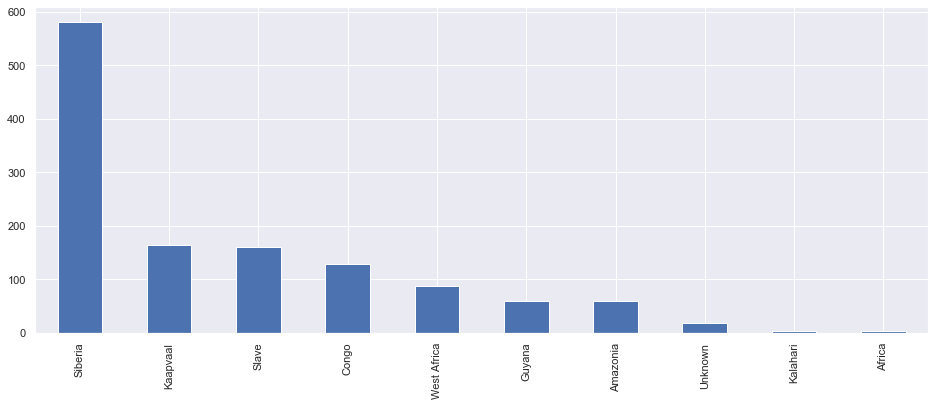

In [66]:
plt.figure(figsize=(16, 6))
df.craton.value_counts().plot(kind = 'bar')

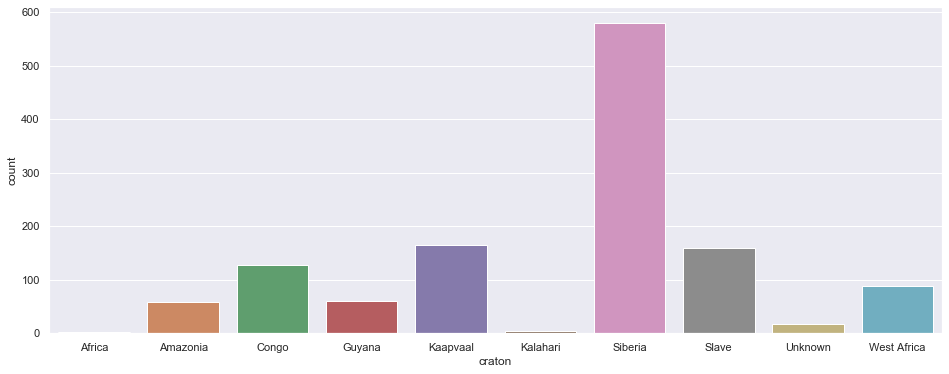

In [131]:
plt.figure(figsize=(16, 6))
sns.countplot(df.craton)

In [67]:
#df.craton = le.fit_transform(df.craton.astype(str))
df.craton=df.craton.astype('category')

In [68]:
df.craton.nunique()
df.craton.value_counts()

Siberia        580
Kaapvaal       164
Slave          160
Congo          128
West Africa     88
Guyana          60
Amazonia        59
Unknown         18
Kalahari         4
Africa           3
Name: craton, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   craton    1264 non-null   category
 1   Si        1109 non-null   float64 
 2   Ti        1109 non-null   float64 
 3   Al        1109 non-null   float64 
 4   Cr        1109 non-null   float64 
 5   V         955 non-null    float64 
 6   Mn        1102 non-null   float64 
 7   Mg        1109 non-null   float64 
 8   Ca        1109 non-null   float64 
 9   Sr        940 non-null    float64 
 10  Ba        947 non-null    float64 
 11  Na        1102 non-null   float64 
 12  P         1018 non-null   float64 
 13  K         1108 non-null   float64 
 14  Fe        1109 non-null   float64 
 15  Co        945 non-null    float64 
 16  Ni        1075 non-null   float64 
 17  S         950 non-null    float64 
 18  Zn        945 non-null    float64 
 19  Cr_trace  686 non-null    float64 
 20  Co_trace

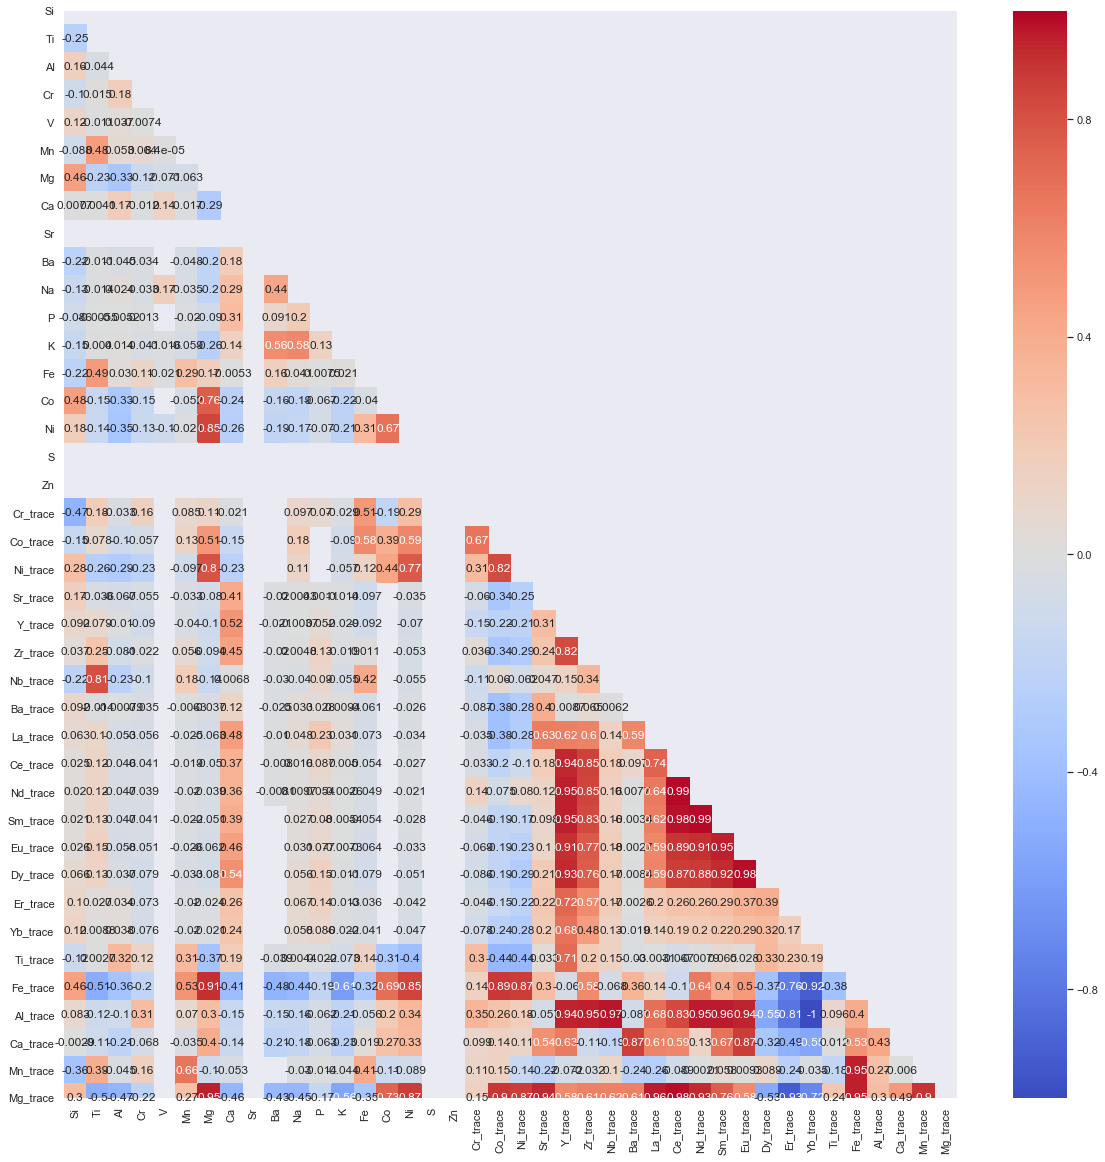

In [133]:
#import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
matrix = np.triu(df.corr())
p1=sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)
p1

# Impute based on craton

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(sample_posterior=True, min_value=0, random_state=2020)
#df8 = pd.DataFrame(imputer.fit_transform(df7))

In [72]:
cratons = df.craton.values
cratons=cratons.astype('str')
cratons

array(['Guyana', 'Guyana', 'Guyana', ..., 'Africa', 'Africa', 'Africa'],
      dtype='<U11')

In [73]:
Siberia=df[df['craton'].str.contains("Siberia")]
Siberia.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
347,Siberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.72,0.212,NaN,NaN,NaN,NaN,NaN,0.0,0.611,0.845,0.0,0.106,0.011,NaN,NaN,0.079,NaN,NaN,NaN,NaN,NaN,NaN
348,Siberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.00,NaN,170.000,270.00,3.20,11.0,240.0,3110.0,72.000,80.000,NaN,NaN,NaN,NaN,NaN,NaN,62.0,4900.00,NaN,315.0,37.0,NaN
349,Siberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.01,NaN,30.0,1.6,NaN
350,Siberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.40,NaN,1.200,3.50,0.64,1.5,0.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,93.00,NaN,229.0,0.4,NaN
351,Siberia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,NaN,0.800,1.12,1.28,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,305.00,NaN,17.0,0.8,NaN


In [74]:
Siberia_im=pd.DataFrame(imputer.fit_transform(Siberia.drop('craton', axis=1)))
Siberia_cra=Siberia.craton
Siberia2=pd.concat([Siberia_cra, Siberia_im])
Siberia_im.craton=Siberia.craton
#Siberia_im

In [75]:
Siberia_im.craton=Siberia.craton
Siberia_im.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.120538,0.000000,2.036329,0.000000,0.000027,1.282614,6.454968,35.859731,0.000751,0.000000,1.221562,0.623839,0.008728,19.360202,0.011991,0.036953,0.000526,0.000077,2.72,0.212000,0.000,0.00,39.867283,70.039813,0.000000,0.000000,0.611000,0.845000,0.000000,0.106000,0.011000,3.229294,2.483657,0.079,0.0,175584.774428,74.209791,1035.594422,4361.732948,57228.969702
1,0.398859,0.574859,0.301908,0.844661,0.001431,0.000000,14.611705,9.111768,0.000100,0.000000,8.144257,2.689253,19.355519,10.242903,0.000000,0.000000,0.000362,0.000148,26.00,0.000000,170.000,270.00,3.200000,11.000000,240.000000,3110.000000,72.000000,80.000000,0.000000,2.079544,1.177099,0.000000,0.000000,0.000,62.0,4900.000000,697.488136,315.000000,37.000000,89904.060481
2,0.000000,0.568965,0.000000,1.254933,0.000358,0.553018,32.559193,4.258115,0.001495,2.029878,6.787717,0.995939,13.593939,2.467601,0.000814,0.254990,0.001483,0.000990,2.00,22.689156,0.016,0.00,0.000000,62.257251,20.007181,285.275588,6.700044,21.044410,9.555578,0.176487,0.186632,0.000000,0.000000,0.000,4.0,0.010000,0.000000,30.000000,1.600000,284790.220688
3,0.000000,0.000000,0.000000,2.597642,0.000990,3.032392,47.200597,0.000000,0.004230,4.373471,12.967261,1.472765,9.510969,0.000000,0.002546,0.180644,0.002639,0.002555,1.40,34.052306,1.200,3.50,0.640000,1.500000,0.800000,26.400000,6.319838,9.531485,7.366719,0.000000,1.074105,0.000000,0.000000,0.000,9.0,93.000000,0.000000,229.000000,0.400000,419942.370103
4,0.000000,0.000000,0.000000,2.237680,0.001188,1.362315,30.247752,0.764030,0.000845,3.142131,9.551179,0.945108,12.561306,3.209499,0.011212,0.097131,0.000075,0.001611,3.50,17.191117,0.800,1.12,1.280000,1.600000,7.608256,130.522864,7.623928,4.308904,0.000000,0.116542,1.357821,0.000000,0.000000,0.000,5.0,305.000000,0.000000,17.000000,0.800000,228581.161182


### Split data into craton and elements

In [76]:
cratons = df.craton.values
cratons=cratons.astype('str')
cratons

array(['Guyana', 'Guyana', 'Guyana', ..., 'Africa', 'Africa', 'Africa'],
      dtype='<U11')

In [77]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([3, 3, 3, ..., 0, 0, 0])

In [78]:
features = df.drop(['craton'], axis=1)
features.shape

(1264, 40)

In [79]:
features.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0.000,30.354,0.008,0.027,0.0,0.364,0.270,0.017,0.0,0.0,0.024,0.0,0.027,37.022,0.0,0.038,0.0,0.0,260.0,56.0,181.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.076,0.147,0.224,0.100,NaN,NaN,NaN,55.640,3251.0,NaN
1,0.014,32.008,0.048,0.027,0.0,0.395,0.342,0.029,0.0,0.0,0.024,0.0,0.033,33.281,0.0,0.094,0.0,0.0,4172.0,429.0,6375.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.111,0.129,0.392,0.328,NaN,NaN,NaN,97.424,1887.0,NaN
2,0.070,0.689,1.138,2.155,0.0,0.201,29.868,0.017,0.0,0.0,0.024,0.0,0.027,36.369,0.0,0.809,0.0,0.0,2944.0,155.0,790.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.160,0.320,0.640,0.320,NaN,NaN,NaN,156.800,2397.0,NaN
3,0.005,30.102,0.008,0.027,0.0,0.565,0.072,0.021,0.0,0.0,0.024,0.0,0.027,35.941,0.0,0.038,0.0,0.0,153.0,53.0,13.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.069,0.186,0.248,0.154,NaN,NaN,NaN,71.488,2898.0,NaN
4,0.028,32.464,0.069,0.027,0.0,0.325,0.300,0.017,0.0,0.0,0.024,0.0,0.027,31.290,0.0,0.055,0.0,0.0,NaN,NaN,NaN,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.000,0.100,0.256,0.500,NaN,NaN,NaN,67.304,NaN,NaN


In [80]:
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [81]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    plt.bar(df_n.index, df_n.Importance)
    plt.xticks(rotation=90)

In [82]:
def print_results(y_true, y_pred, dataset):
    print(dataset,'-- R2: {0}, Accuracy Score: {1}'.format(r2_score(y_true, y_pred), 
                                                              accuracy_score(y_true, y_pred)))

### Split into training set and test set

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1011, 40), (253, 40), (1011,), (253,))

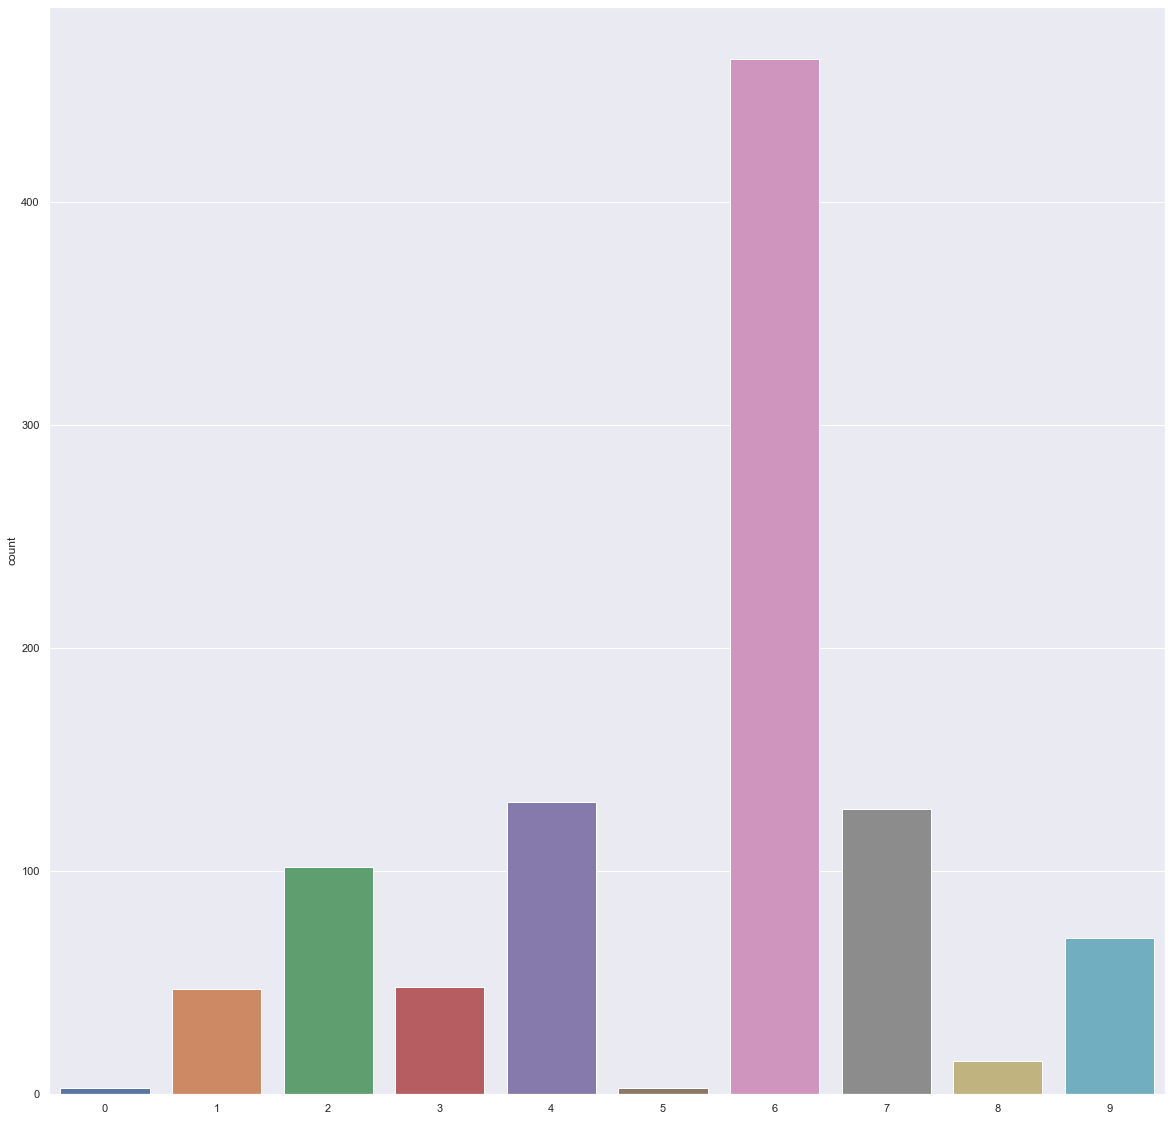

In [84]:
sns.countplot(y_train)

### XGBoost

In [85]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

In [86]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 1.0, Accuracy Score: 1.0


In [87]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9904026341544835, Accuracy Score: 0.9841897233201581


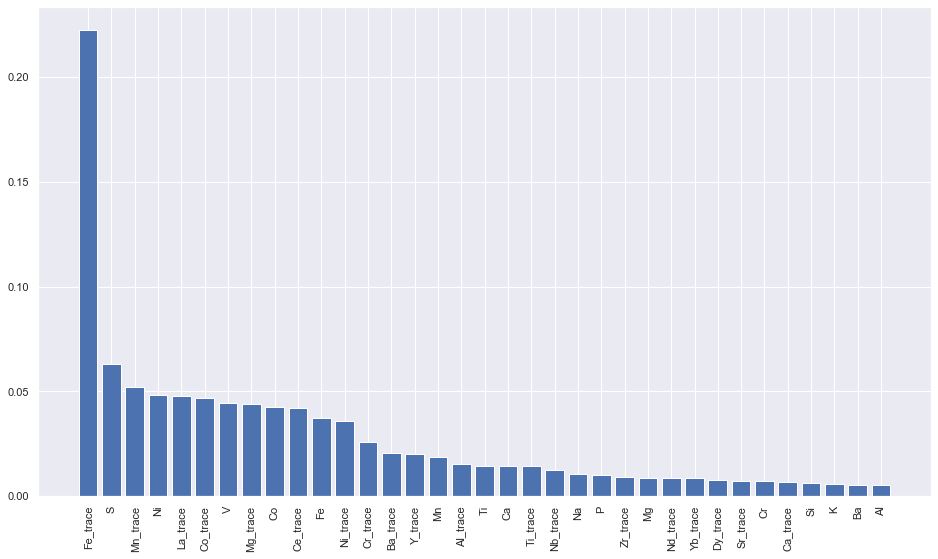

In [88]:
plot_importance(features, xg, 35)

In [89]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 3, 
#                     eval_metric = 'merror', seed=2020)

In [90]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 10, 
                    eval_metric = 'merror', seed=2020)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [91]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 1.0, Accuracy Score: 1.0


In [92]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9904026341544835, Accuracy Score: 0.9841897233201581


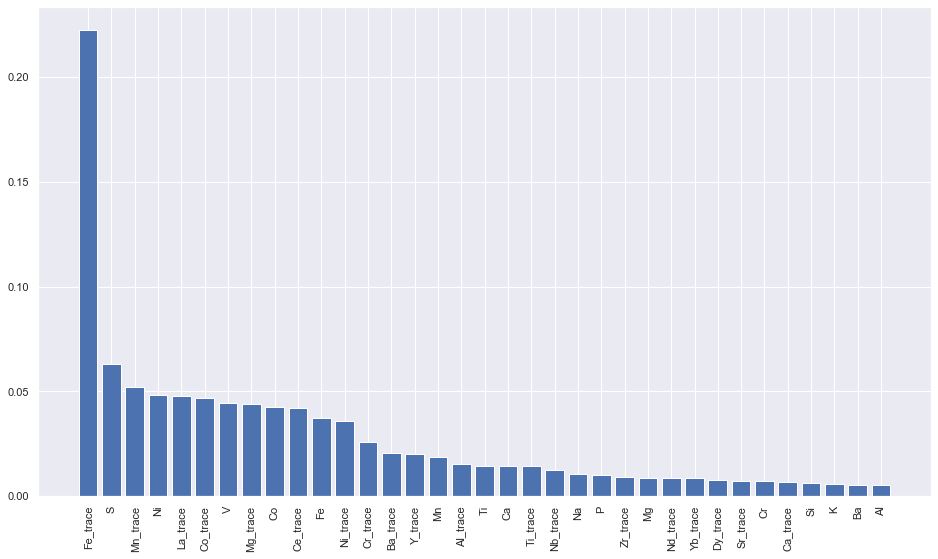

In [93]:
plot_importance(features, xgb, 35)

### Model Optimization

In [94]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [95]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [96]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [97]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 10, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [98]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_class=10, num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
          

In [99]:
xgb_cv.best_params_

{'eta': 0.1, 'gamma': 1, 'max_depth': 4}

In [171]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=10, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [100]:
xgb_cv.best_score_

0.9436277617909574

In [101]:
xgb_best = xgb_cv.best_estimator_

In [102]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [103]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9888216546124878, Accuracy Score: 0.9960435212660732


In [104]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9299392293277292, Accuracy Score: 0.9683794466403162


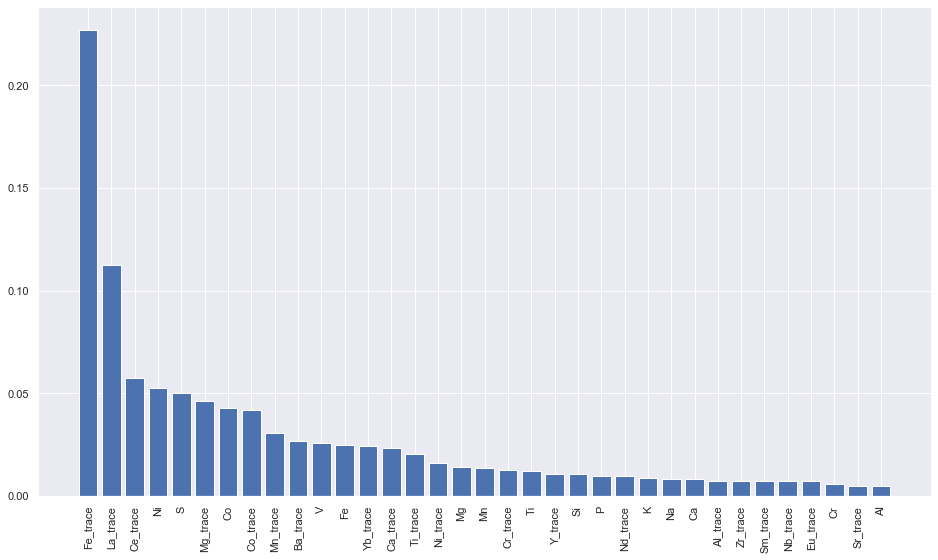

In [120]:
plot_importance(features, xgb_best, 35)

### ============ Save the best model ==================================

In [121]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 3, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 4, seed=2020)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [122]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [123]:
print_results(y_train, y_train_preds, 'training')

training -- R2: 0.9888216546124878, Accuracy Score: 0.9960435212660732


In [124]:
print_results(y_test, y_test_preds, 'test')

test -- R2: 0.9299392293277292, Accuracy Score: 0.9683794466403162


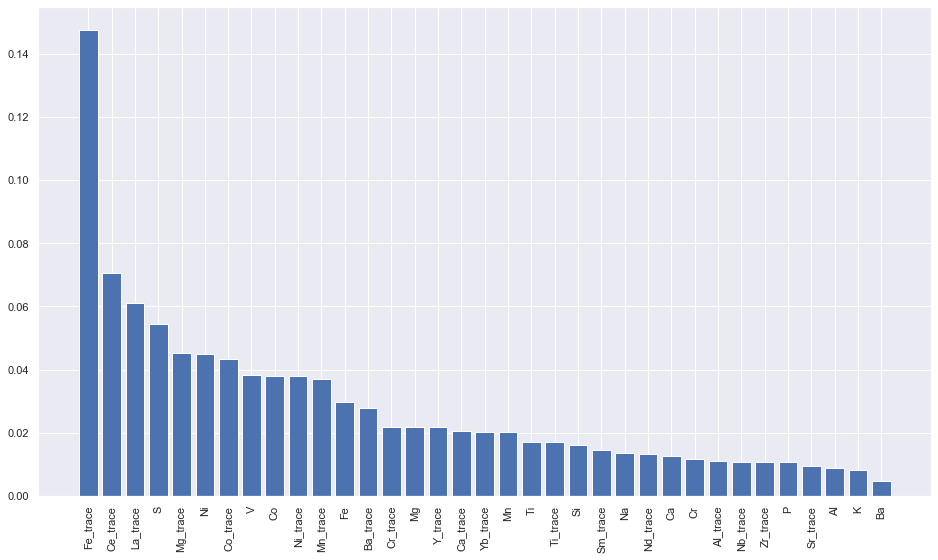

In [125]:
plot_importance(features, xgb_best, 35)

In [126]:
# with open('diamonds_xgb_gridsearchbest.pkl', 'wb') as f:
#     pickle.dump(xgb_best, f)

In [127]:
#pip install shap

In [128]:
import shap

In [129]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)


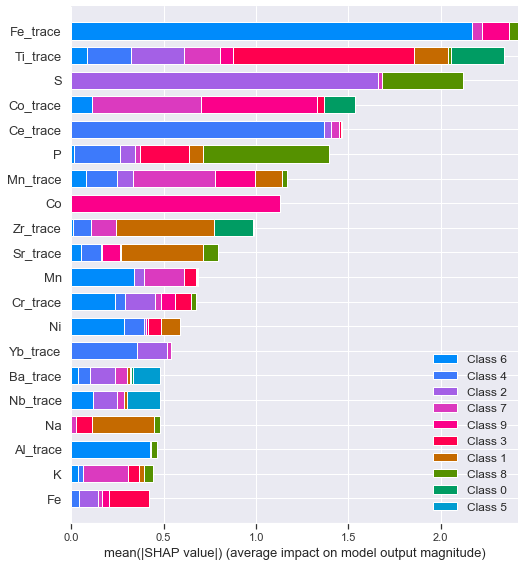

In [130]:
# take the mean absolute value of the SHAP values for 
# each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, X_train, plot_type="bar")